# 案例：股票收益率预测——LR模型


接上一节内容，本节使用线性回归模型（Linear Regression model）来回归股票收益率序列。

In [3]:
import pandas as pd
X_train = pd.read_csv('datasets/X_train.csv', index_col=0)
X_test = pd.read_csv('datasets/X_test.csv', index_col=0)
y_train = pd.read_csv('datasets/y_train.csv', index_col=0)
y_test = pd.read_csv('datasets/y_test.csv', index_col=0)

In [25]:
X_train.index = pd.to_datetime(X_train.index)
X_test.index = pd.to_datetime(X_test.index)
y_train.index = pd.to_datetime(y_train.index)
y_test.index = pd.to_datetime(y_test.index)


## 5. 线性回归模型——LR

### 5.1 样本内训练

首先，初始化线性回归模型

In [5]:
from sklearn import linear_model
model = linear_model.LinearRegression()

其次，训练模型

In [6]:
model.fit(X_train, y_train)

LinearRegression()

然后，生成预测结果

In [7]:
IS_predicted_y = model.predict(X_train)

再次，计算模型预测精度、拟合优度$R^2$、误差

In [8]:
IS_precision = model.score(X_train, y_train)

In [9]:
from sklearn.metrics import r2_score
IS_r2 = r2_score(IS_predicted_y, y_train)

In [27]:
from sklearn.metrics import mean_squared_error
error_Training_LR = mean_squared_error(IS_predicted_y, y_train)
error_Training_LR

0.001146025529553146

最后，生成汇总信息（summary）

In [17]:
print("系数: %s" %model.feature_names_in_)
print("系数: %s" %model.coef_)
print("截距: %.4f" %model.intercept_)
print("样本内(IS)训练集精度:%.2f" %IS_precision)
print("拟合优度R-squared: %.2f" % IS_r2)

系数: ['GOOGL' 'IBM' 'USDJPY' 'GBPUSD' 'SPX' 'VIX' 'DJI' 'MSFT_5DT' 'MSFT_15DT'
 'MSFT_30DT' 'MSFT_60DT']
系数: [[-0.05596046 -0.10430595  0.01351491 -0.0229964   0.14826069 -0.00968826
  -0.048862   -0.1678413   0.03704181 -0.03023317 -0.0183766 ]]
截距: 0.0064
样本内(IS)训练集精度:0.04
拟合优度R-squared: -20.60


/var/folders/sv/xyzb31jx2zz1ns_qr3d7hy700000gn/T/ipykernel_47360/1925513240.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("截距: %.4f" %model.intercept_)


模型的回归方程是

$$
对数收益率 = -0.05596046 * GOOGL -0.10430595 *IBM + 0.01351491*USDJPY \dots
$$

我们将样本内IS的y和预测出的y绘制到一张图片上：

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

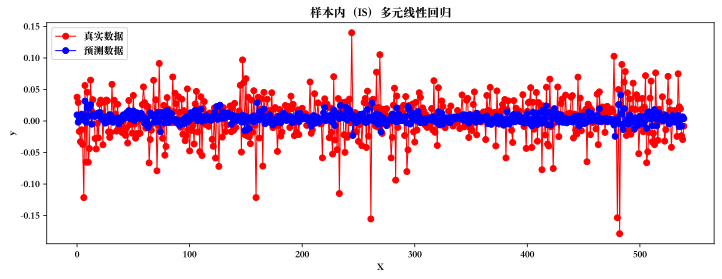

In [14]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(y_train)), y_train, 'o-',label='真实数据', linewidth=1, color="red")
ax.plot(range(len(y_train)), IS_predicted_y, 'o-', label='预测数据', linewidth=1, color="blue")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('样本内（IS）多元线性回归')
ax.legend(loc='upper left')
plt.show()

### 5.2 样本外表现

我们再来看看我们刚才训练的模型，在样本外的表现。

In [18]:
y_predicted = model.predict(X_test)

再次，计算模型预测精度和拟合优度$R^2$

In [19]:
precision = model.score(X_test, y_test)

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_predicted, y_test)
error_Test_LR = mean_squared_error(y_predicted, y_test)
error_Test_LR

0.0012936323800148094

最后，生成汇总信息（summary）

In [23]:
print("样本外（OOS）测试集预测精度:%.2f" %precision)
print("拟合优度R-squared: %.2f" % r2)

样本外（OOS）测试集预测精度:-0.02
拟合优度R-squared: -18.52


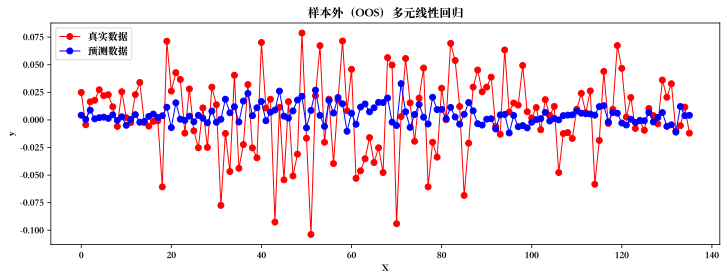

In [24]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(y_test)), y_test, 'o-', label='真实数据', linewidth=1, color="red")
ax.plot(range(len(y_test)), y_predicted, 'o-', label='预测数据', linewidth=1, color="blue")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('样本外（OOS）多元线性回归')
ax.legend(loc='upper left')
plt.show()